In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pyESN import ESN

In [222]:
def generateSumOfTwoSinusoids():
    fs = 10
    T = 1/fs
    start_time = 0
    end_time = 30
    f1 = np.random.rand()
    f2 = np.random.rand()
    t = np.arange(start_time,end_time,T)
    
    x1 = np.sin(2*np.pi*t*f1)
    x2 = np.sin(2*np.pi*t*f2)
    x = (x1+x2+2)/4
    return f1,f2,x

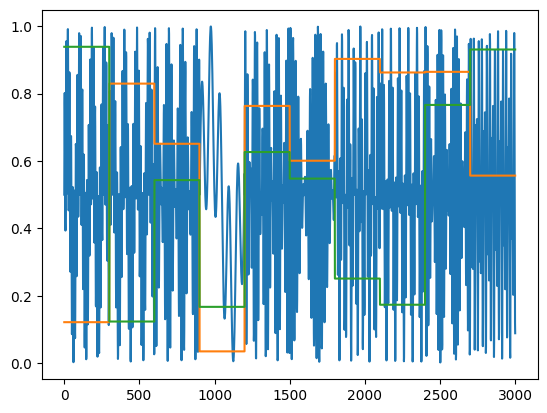

In [223]:
# ctrl with initialization row
ctrl = np.array([1,0,0])
output = np.array([-1])
for i in range(10):
    f1,f2,x = generateSumOfTwoSinusoids()
    ctrl = np.vstack((ctrl,[[1,f1,f2]]*len(x)))
    output = np.hstack((output,x))
# remove initialization row
ctrl = np.delete(ctrl,0,axis=0)
output = np.delete(output,0)
plt.plot(output)
plt.plot(ctrl[:,1:])
traintest_cutoff = int(np.ceil(0.7*len(output)))

train_ctrl,train_output = ctrl[:traintest_cutoff],output[:traintest_cutoff]
test_ctrl, test_output  = ctrl[traintest_cutoff:],output[traintest_cutoff:]

In [343]:
min_error = 100
for i in range(2):
    temp_esn = ESN(n_inputs = 3,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 0.5,
          sparsity = 0.95,
          noise = 0.001,
          teacher_scaling = 1.12,
          teacher_shift = -0.7,
          out_activation = np.tanh,
          inverse_out_activation = np.arctanh,
          silent = True)
    pred_train_tmp = temp_esn.fit(train_ctrl,train_output)
    pred_test_tmp = temp_esn.predict(test_ctrl)
    test_error = np.sqrt(np.mean((pred_test - test_output)**2))
    print(test_error)
    if(test_error < min_error):
        min_error = test_error
        esn = temp_esn
        pred_train = pred_train_tmp
        pred_test = pred_test_tmp

0.4912494493317391
0.42615211697670374


(-0.1, 1.1)

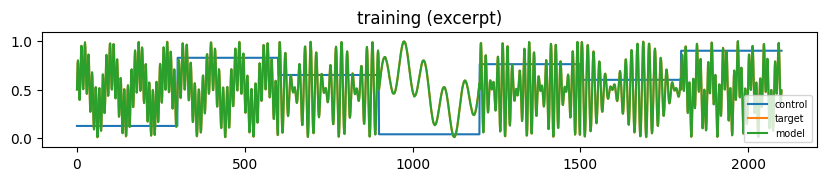

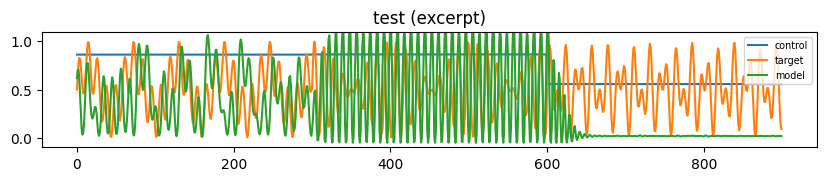

In [344]:

plt.figure(figsize=(10,1.5))
plt.plot(train_ctrl[:,1],label='control')
plt.plot(train_output,label='target')
plt.plot(pred_train,label='model')
plt.legend(fontsize='x-small')
plt.title('training (excerpt)')
plt.ylim([-0.1,1.1])

plt.figure(figsize=(10,1.5))
plt.plot(test_ctrl[:,1],label='control')
plt.plot(test_output,label='target')
plt.plot(pred_test,label='model')
plt.legend(fontsize='x-small')
plt.title('test (excerpt)')
plt.ylim([-0.1,1.1])

Text(0.5, 1.0, 'test: model')

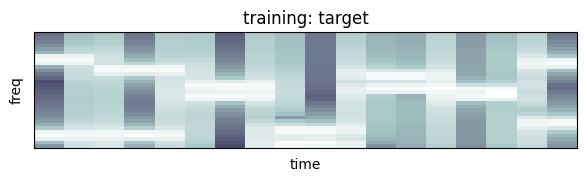

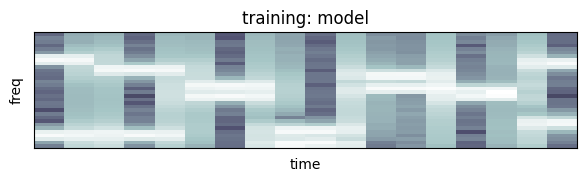

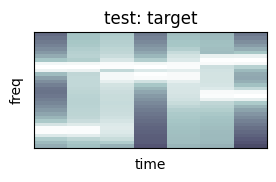

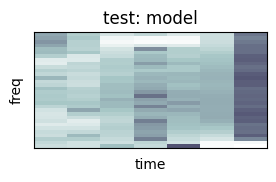

In [345]:
def draw_spectogram(data):
    plt.specgram(data,Fs=4,NFFT=256,noverlap=150,cmap=plt.cm.bone,detrend=lambda x:(x-0.5))
    plt.gca().autoscale('x')
    plt.ylim([0,0.5])
    plt.ylabel("freq")
    plt.yticks([])
    plt.xlabel("time")
    plt.xticks([])

plt.figure(figsize=(7,1.5))
draw_spectogram(train_output.flatten())
plt.title("training: target")
plt.figure(figsize=(7,1.5))
draw_spectogram(pred_train.flatten())
plt.title("training: model")

plt.figure(figsize=(3,1.5))
draw_spectogram(test_output.flatten())
plt.title("test: target")
plt.figure(figsize=(3,1.5))
draw_spectogram(pred_test.flatten())
plt.title("test: model")

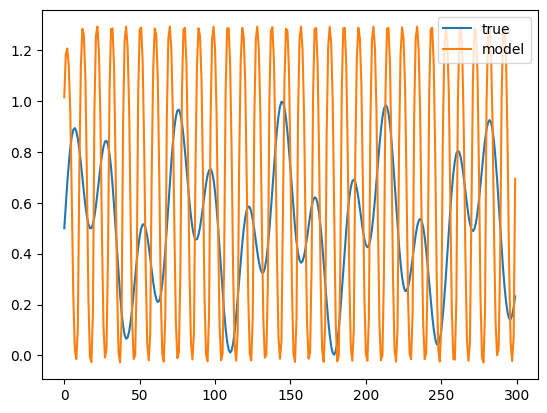

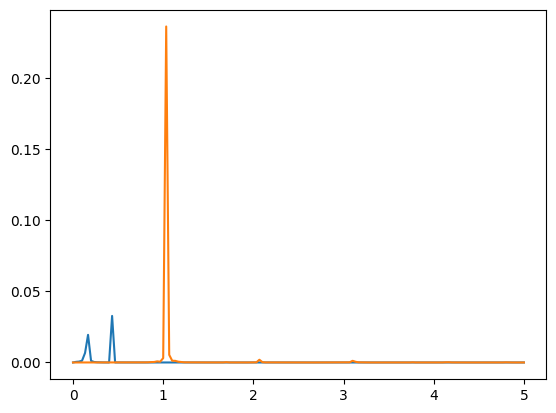

In [346]:
f1,f2,x = generateSumOfTwoSinusoids()
y_pred = esn.predict(np.array([[1,f1,f2]]*len(x))).squeeze()
plt.plot(x,label='true')
plt.plot(y_pred,label='model')
plt.legend()
from scipy.signal import periodogram
f1s, Pxx1 = periodogram(x, 10,scaling='spectrum')
f2s, Pxx2 = periodogram(y_pred, 10,scaling='spectrum')
plt.figure()
plt.plot(f1s,Pxx1,label='true')
plt.plot(f2s,Pxx2,label='model')